# Quickstart

After installing `lambeq` you can quickly check if everything went OK by using the {ref}`command-line interface <sec-cli>`. Run the following command in a terminal:

```bash
$ lambeq "John gave Mary a flower"
```

The first time you run `lambeq`, it will need a few minutes to download {term}`Bobcat`'s statistical model. After this you should see in the terminal the {term}`pregroup <pregroup grammar>` diagram for the given sentence:

```bash
John       gave      Mary    a    flower                                                          
────  ─────────────  ────  ─────  ──────
 n    n.r·s·n.l·n.l   n    n·n.l    n
 ╰─────╯  │  │   ╰────╯    │  ╰─────╯
          │  ╰─────────────╯
```

You are now ready for some real `lambeq` coding! Let's see how the above result can be achieved programmatically. Open your Python interpreter or a Jupyter notebook and type the following:

In [1]:
from lambeq import BobcatParser

Let's create a new {term}`parser` object that we'll use to get the pregroup diagram of the sentence.

In [ ]:
parser = BobcatParser()
diagram = parser.sentence2diagram("John gave Mary a flower")

You can display the diagram by using its {py:meth}`~lambeq.backend.grammar.Diagram.draw` method.

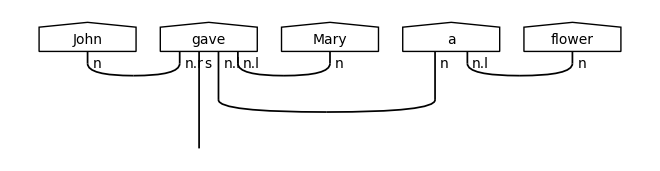

In [3]:
diagram.draw()

To use the above diagram on a quantum computer, we need to first convert it into a {term}`quantum circuit`. This can be done with the help of an {term}`ansatz <ansatz (plural: ansätze)>`. 

In [5]:
from lambeq import IQPAnsatz, AtomicType

In order to create the ansatz, we need to provide the number of qubits for each wire. Note that each wire is annotated with a type, `n` representing nouns and `s` the entire sentence; that is the reason for also importing the {py:class}`~.AtomicType` class. To create the ansatz, we need to pass a mapping of each type/wire to a specific number of qubits.

In [8]:
mapping = { AtomicType.NOUN: 1, AtomicType.SENTENCE: 1 }
ansatz = IQPAnsatz(mapping, n_layers=1)